## Array-Oriented Programming with Arrays
Using NumPy arrays enables you to express many kinds of data processing tasks as
 concise array expressions that might otherwise require writing loops. This practice of
 replacing explicit loops with array expressions is commonly referred to as vectoriza
tion.

 As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2)
 across a regular grid of values. The np.meshgrid function takes two 1D arrays and
 produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays

In [1]:
import numpy as np

In [3]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [4]:
x, y = np.meshgrid(points, points)

In [6]:
y

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [7]:
z = np.sqrt(x**2 + y**2)

In [8]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

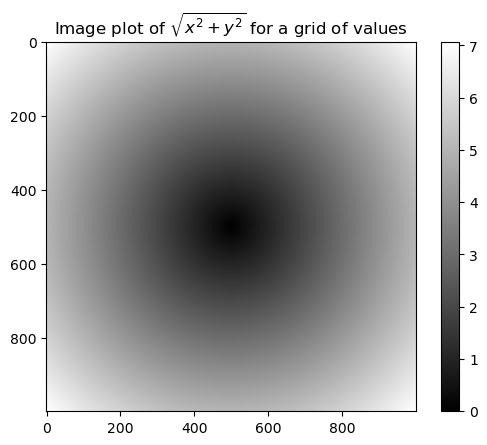

In [9]:
import matplotlib.pyplot as plt
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.show()

## Expressing Conditional Logic as Array Operations
The numpy.where function is a vectorized version of the ternary expression x if con
 dition else y. Suppose we had a boolean array and two arrays of values

In [15]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [16]:
result = [(x if c else y)
         for x, y, c in zip(xarr, yarr, cond)]

In [17]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

With np.where you can write this very concisely

In [19]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

A typical use of where in data analysis is to produce a new array
 of values based on another array

In [20]:
arr = np.random.randn(4, 4)
arr

array([[-0.60326786,  0.19167971,  0.05826848, -0.21508985],
       [ 0.15041399, -0.36231975, -1.35686829,  0.69626605],
       [ 1.13308304,  0.56927237,  1.05184566,  0.29659879],
       [ 0.75424528, -1.36708325,  1.49006455, -1.3632777 ]])

In [10]:
np.where(arr < 0, 2, -2)

NameError: name 'arr' is not defined

## Mathematical and Statistical Methods

In [2]:
arr = np.random.randn(5, 4)

In [3]:
arr

array([[-2.16844378, -0.9938662 ,  1.03848821, -0.07736152],
       [ 0.67443323,  1.43541914,  0.23090557, -0.22424548],
       [ 0.00890736,  0.16488963, -0.15569199,  0.7173704 ],
       [ 0.26767865, -0.26715737,  0.64654143,  1.41653206],
       [ 0.03589993, -0.04004645,  0.32541441, -0.47330924]])

In [4]:
arr.mean()

0.1281179006048425

In [5]:
arr.sum()

2.56235801209685

In [6]:
arr.std()

0.7915652059805757

In [7]:
arr.min()

-2.168443775373533

In [8]:
arr.max()

1.435419144972863

Functions like mean and sum take an optional axis argument that computes the statistic
over the given axis, resulting in an array with one fewer dimension:

In [9]:
arr = np.array([
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
])

In [10]:
arr.sum(axis=0) # vertically aggregate

array([12, 15, 18])

In [11]:
arr.sum(axis=1) # horizontally aggregate

array([ 6, 15, 24])

In [12]:
# Same as mean method
arr.mean(axis=0)

array([4., 5., 6.])

Other methods like cumsum and cumprod do not aggregate, instead producing an array
of the intermediate results:

In [13]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

the cumulative sum of the array [a, b, c] would be [a, a+b, a+b+c].

![array statistical methods](Assets/array_statistical_methods.png)

In [14]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [15]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

In [16]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [17]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

In NumPy, the functions np.argmin and np.argmax are used to find the indices of the minimum and maximum elements in an array, respectively.

In [18]:
arr = np.array([1, 3, 2, 7, 4])

min_index = np.argmin(arr)
print(min_index)  # Output: 0 (index of the minimum value, which is 1)

max_index = np.argmax(arr)
print(max_index)  # Output: 3 (index of the maximum value, which is 7)

0
3


## Methods for Boolean Arrays

In [19]:
arr = np.random.randn(100)

In [20]:
(arr > 0).sum()

46

There are two additional methods, any and all, useful especially for boolean arrays.
any tests whether one or more values in an array is True, while all checks if every
value is True:

In [21]:
bools = np.array([False, False, True, False])

In [22]:
bools.any()

True

In [23]:
bools.all()

False

## Sorting

The `np.sort` function in NumPy is used to return a sorted copy of an array. It can sort arrays along a specified axis or flatten the array before sorting. Here's a brief overview of its usage and parameters:

### Syntax

```python
np.sort(a, axis=-1, kind='quicksort', order=None)
```

### Parameters

- **a**: array_like
  - The array to be sorted.

- **axis**: int or None, optional
  - The axis along which to sort. Default is `-1` (the last axis). If `None`, the array is flattened before sorting.

- **kind**: {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
  - The sorting algorithm to use. Default is 'quicksort'.
  - `'quicksort'` is fast but not stable.
  - `'mergesort'` is stable and can be used for stable sorting.
  - `'heapsort'` is also an option but usually slower.
  - `'stable'` is a stable sort that guarantees the order of equal elements.

- **order**: str or list of str, optional
  - When `a` is an array with fields defined, this parameter specifies which fields to compare first, second, etc.

### Returns

- **sorted_array**: ndarray
  - A sorted copy of the input array.


### Notes

- `np.sort` returns a sorted copy and does not modify the original array.
- For in-place sorting, you can use the `sort` method of NumPy arrays: `array.sort()`.

Using `np.sort` allows you to sort arrays efficiently with control over the sorting algorithm and the axis of sorting.

In [25]:
array = np.array([[3, 2, 1], [6, 5, 4]])
sorted_array = np.sort(array, axis=1)
print(sorted_array)
# Output: [[1 2 3]
#          [4 5 6]]

[[1 2 3]
 [4 5 6]]


In [26]:
sorted_array = np.sort(array, kind='mergesort')
print(sorted_array)

[[1 2 3]
 [4 5 6]]


In [27]:
structured_array = np.array([(3, 'apple'), (1, 'banana'), (2, 'cherry')],
                            dtype=[('number', int), ('fruit', 'U10')])
sorted_array = np.sort(structured_array, order='number')
print(sorted_array)
# Output: [(1, 'banana') (2, 'cherry') (3, 'apple')]

[(1, 'banana') (2, 'cherry') (3, 'apple')]


## Unique and Other Set Logic
A commonly
used one is np.unique, which returns the sorted unique values in an array:
![set_method](Assets/set_method.png)

In [28]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [30]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

## Linear Algebra
![Linalg](Assets/linalg_1.png)
![Linalg](Assets/linalg_2.png)

In [2]:
x = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
y = np.array([
    [4, 7],
    [1, 9],
    [4, -1]
])

x.dot(y)
x@y

array([[18, 22],
       [45, 67]])

`numpy.linalg` has a standard set of matrix decompositions and things like inverse
 and determinant.

In [3]:
from numpy.linalg import inv, qr

In [4]:
x = np.random.randn(5, 5)

In [9]:
mat = x.T.dot(x)

In [10]:
inv(mat)

array([[ 1.14745267, -0.51978934, -0.21569507, -0.19119623,  0.3493008 ],
       [-0.51978934,  0.9349999 , -0.17529797,  0.58520924, -0.36813975],
       [-0.21569507, -0.17529797,  0.43505675, -0.22481592,  0.08494191],
       [-0.19119623,  0.58520924, -0.22481592,  0.63279593, -0.17998752],
       [ 0.3493008 , -0.36813975,  0.08494191, -0.17998752,  0.39479701]])

In [11]:
mat.dot(inv(mat))

array([[ 1.00000000e+00, -5.55111512e-17,  4.16333634e-17,
        -2.77555756e-17, -5.55111512e-17],
       [ 1.11022302e-16,  1.00000000e+00, -1.11022302e-16,
         3.33066907e-16,  1.11022302e-16],
       [-1.66533454e-16, -1.11022302e-16,  1.00000000e+00,
         5.55111512e-17,  0.00000000e+00],
       [-2.22044605e-16,  9.43689571e-16, -2.77555756e-17,
         1.00000000e+00,  0.00000000e+00],
       [ 4.44089210e-16,  2.22044605e-16,  0.00000000e+00,
         1.11022302e-16,  1.00000000e+00]])

In [12]:
q, r = qr(mat)

In [13]:
q

array([[-0.66675277,  0.01700095,  0.43201223, -0.31493642,  0.51897225],
       [-0.32523315, -0.69710102, -0.05490704, -0.32571644, -0.54696214],
       [-0.52700186,  0.10300434, -0.80204126,  0.22904581,  0.1262021 ],
       [ 0.02972508,  0.56408437, -0.20433041, -0.75343425, -0.26741572],
       [ 0.41358144, -0.43006984, -0.35401912, -0.4178501 ,  0.58656805]])

In [14]:
r

array([[-2.91068438, -1.55381788, -3.81573855,  0.11571459,  3.04765988],
       [ 0.        , -5.25625369,  1.57128811,  5.1825671 , -3.96602954],
       [ 0.        ,  0.        , -2.40023652, -1.4750881 , -1.0527838 ],
       [ 0.        ,  0.        ,  0.        , -1.71393388, -1.83977281],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.48574595]])

## Pseudorandom Number Generation
![random](Assets/random.png)

In [19]:
samples = np.random.normal(size=(4, 4))

In [20]:
samples

array([[-0.86542183,  1.6972598 , -1.90676302, -2.50918017],
       [ 0.47186645, -0.34502554,  1.19270579,  0.04722641],
       [-0.1848056 , -0.69009588,  0.29529935,  0.85061604],
       [-0.30055741,  0.11836872, -0.02163211,  0.83470638]])

You can change NumPy’s random number generation seed using
 np.random.seed

In [21]:
np.random.seed(1234)

In [23]:
np.random.randn(4, 4, 2)

array([[[ 1.04757857,  1.04593826],
        [ 0.86371729, -0.12209157],
        [ 0.12471295, -0.32279481],
        [ 0.84167471,  2.39096052]],

       [[ 0.07619959, -0.56644593],
        [ 0.03614194, -2.0749776 ],
        [ 0.2477922 , -0.89715678],
        [-0.13679483,  0.01828919]],

       [[ 0.75541398,  0.21526858],
        [ 0.84100879, -1.44581008],
        [-1.40197328, -0.1009182 ],
        [-0.54824245, -0.14461951]],

       [[ 0.35402033, -0.03551303],
        [ 0.56573831,  1.5456588 ],
        [-0.97423633, -0.07034488],
        [ 0.30796886, -0.20849876]]])

The data generation functions in numpy.random use a global random seed. To avoid
 global state, you can use numpy.random.RandomState to create a random number
 generator isolated from others:

In [24]:
rng = np.random.RandomState(1234)

In [25]:
rng.randn(4, 4)

array([[ 4.71435164e-01, -1.19097569e+00,  1.43270697e+00,
        -3.12651896e-01],
       [-7.20588733e-01,  8.87162940e-01,  8.59588414e-01,
        -6.36523504e-01],
       [ 1.56963721e-02, -2.24268495e+00,  1.15003572e+00,
         9.91946022e-01],
       [ 9.53324128e-01, -2.02125482e+00, -3.34077366e-01,
         2.11836468e-03]])

## Random Walks

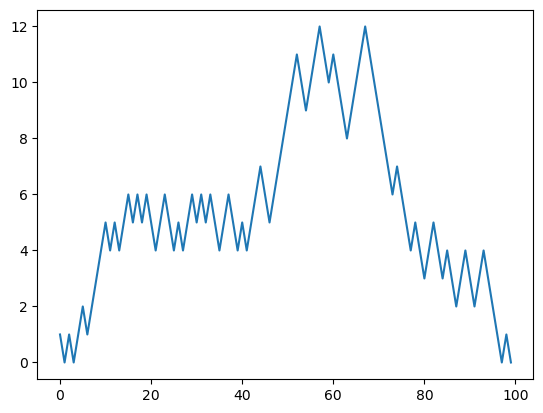

In [32]:
# In pure python
import random
import matplotlib.pyplot as plt

position = 0
walk = []
steps = 1000

for _ in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

plt.plot(walk[:100])
plt.show()

In [37]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0, 2, size=(nwalks, nsteps))
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)
walks

array([[  1,   2,   1, ...,  32,  33,  32],
       [  1,   2,   3, ..., -26, -27, -28],
       [  1,   0,   1, ...,  10,   9,  10],
       ...,
       [ -1,   0,  -1, ..., -16, -15, -16],
       [  1,   0,   1, ..., -32, -33, -32],
       [ -1,   0,  -1, ...,  -2,  -1,  -2]])

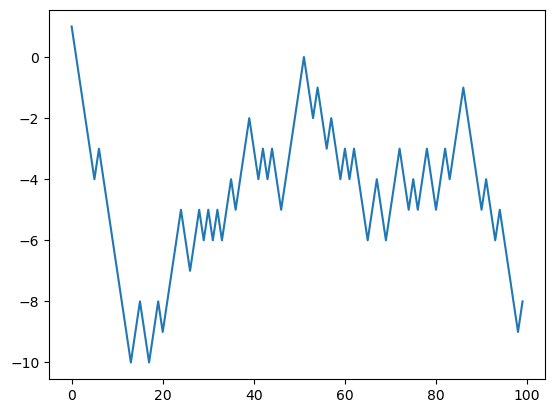

In [35]:
plt.plot(walks[:100])

## Concatenation of arrays
Concatenation, or joining of two arrays in NumPy, is primarily accomplished
through the routines np.concatenate, np.vstack, and np.hstack.

In [2]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
np.concatenate([x, y])

array([1, 2, 3, 4, 5, 6])

In [3]:
grid = np.array([[1, 2, 3],
                [4, 5, 6]])

In [4]:
np.concatenate((grid, grid))

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [5]:
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [6]:
np.concatenate([grid, grid], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack
(vertical stack) and np.hstack (horizontal stack) functions:

In [7]:
x = np.array([1, 2, 3])
y = np.array([
    [4, 5, 6],
    [7, 8, 9]
])

In [8]:
np.vstack([x, y])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [13]:
z = np.array([
    [1],
    [2]
])

In [14]:
np.hstack([y, z])

array([[4, 5, 6, 1],
       [7, 8, 9, 2]])

## Splitting of arrays
The opposite of concatenation is splitting, which is implemented by the functions
np.split, np.hsplit, and np.vsplit. For each of these, we can pass a list of indices
giving the split points:

In [15]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[1 2 3] [99 99] [3 2 1]


## Reshaping Arrays

In [3]:
x = np.arange(8)
x.reshape((4,2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [4]:
arr = np.arange(9)

In [5]:
arr.reshape((3, -1))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])